# IMPORT

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid','notebook'])
plt.rcParams['figure.figsize'] = (7.5,5)
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_curve,plot_roc_curve, plot_confusion_matrix,  RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay, plot_precision_recall_curve, auc, confusion_matrix

#Classification algorithms, preprocessors

'1.1.1'

# LOAD DATASET

In [2]:
dataframe = pd.read_csv('./Datasets/loan_default.csv')

In [33]:
dataframe.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
print(dataframe.shape)
print(dataframe.columns)

(255347, 18)
Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


# CLEANING, PREPROCESSING, SCALING

In [3]:
X = dataframe.drop(columns=['Default','LoanID'], axis=1)
y = dataframe['Default']

In [22]:
#Needs to be encode:
#Education -> Ordinal
#EmploymentType -> OneHot
#MaritalStatus -> OneHot
#HasMortgage -> OneHot
#HasDependents -> OneHot
#LoanPurpose -> OneHot
#HasCoSigner -> OneHot

X['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [5]:
ordinal_enc = OrdinalEncoder(categories=[["High School","Bachelor's","Master's","PhD"]])
onehot_enc = OneHotEncoder(drop='if_binary')
std_scaler = StandardScaler()

In [6]:
column_transformer = make_column_transformer(
    (ordinal_enc, ['Education']),
    (onehot_enc, ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents','LoanPurpose', 'HasCoSigner']),
    remainder='passthrough'
)

In [7]:
X = column_transformer.fit_transform(X)

In [134]:
X

array([[ 1.  ,  1.  ,  0.  , ..., 15.23, 36.  ,  0.44],
       [ 2.  ,  1.  ,  0.  , ...,  4.81, 60.  ,  0.68],
       [ 2.  ,  0.  ,  0.  , ..., 21.17, 24.  ,  0.31],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  5.29, 60.  ,  0.5 ],
       [ 0.  ,  0.  ,  1.  , ..., 20.9 , 48.  ,  0.44],
       [ 1.  ,  0.  ,  0.  , ...,  6.73, 12.  ,  0.48]])

In [135]:
X.shape

(255347, 25)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [9]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191510, 25), (63837, 25), (191510,), (63837,))

# MODEL EVALUATION

In [10]:
LR_model = LogisticRegression().fit(X_train, y_train)

In [11]:
KNN_model = KNeighborsClassifier().fit(X_train, y_train)

In [12]:
DT_model = DecisionTreeClassifier().fit(X_train, y_train)

In [13]:
y_pred_lr = LR_model.predict(X_test)
y_pred_knn = KNN_model.predict(X_test)
y_pred_dt = DT_model.predict(X_test)

In [14]:
print('Score of LR: ', LR_model.score(X_test, y_test))
print('Score of KNN: ', KNN_model.score(X_test, y_test))
print('Score of DT: ', DT_model.score(X_test, y_test))

Score of LR:  0.8857089148926172
Score of KNN:  0.873772263734198
Score of DT:  0.80204270250795


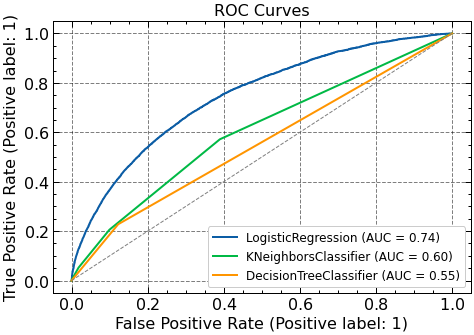

In [18]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR_model, X_test,y_test, ax=ax)
RocCurveDisplay.from_estimator(KNN_model, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(DT_model, X_test, y_test, ax=ax)
plt.plot([0,1],[0,1], c='gray', linestyle='--', linewidth=1)

plt.title('ROC Curves')
plt.legend(loc='best', fontsize=12)
plt.show()

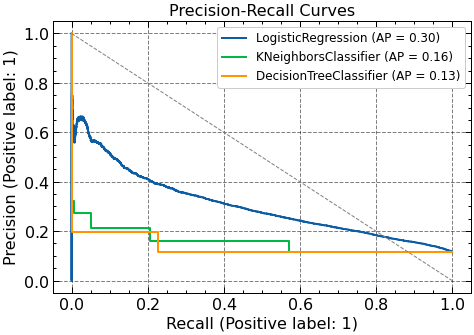

In [24]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR_model, X_test,y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(KNN_model, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(DT_model, X_test, y_test, ax=ax)

plt.title('Precision-Recall Curves')
plt.plot([0,1],[1,0], c='gray', linestyle='--', linewidth=1)
plt.legend(loc='best', fontsize=12)
plt.show()

In [20]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56424
           1       0.63      0.04      0.07      7413

    accuracy                           0.89     63837
   macro avg       0.76      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837



In [21]:
print('KNN Classification Report:')
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56424
           1       0.27      0.05      0.09      7413

    accuracy                           0.87     63837
   macro avg       0.58      0.52      0.51     63837
weighted avg       0.82      0.87      0.83     63837



In [22]:
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56424
           1       0.20      0.23      0.21      7413

    accuracy                           0.80     63837
   macro avg       0.55      0.55      0.55     63837
weighted avg       0.82      0.80      0.81     63837



# HYPERPARAMETER TUNING